In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
loan=pd.read_csv('loan_data_set.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan.shape

(614, 13)

In [4]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:

cat=loan.select_dtypes(include='object')
num=loan.select_dtypes(exclude='object')

cat=cat.columns
num=num.columns
cat

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [9]:
loan.Gender.mode()[0]

'Male'

In [10]:
for i in cat:
     if loan[i].isnull().any():
            fill_value=loan[i].mode()[0]
            print(f"Mode of {i} ",fill_value)
            loan[i].fillna(fill_value,inplace=True)
            
    

Mode of Gender  Male
Mode of Married  Yes
Mode of Dependents  0
Mode of Self_Employed  No


In [11]:
for i in num:
     if loan[i].isnull().any():
            fill_value=loan[i].median()
            print(f"Median of {i} ",fill_value)
            loan[i].fillna(fill_value,inplace=True)
            

Median of LoanAmount  128.0
Median of Loan_Amount_Term  360.0
Median of Credit_History  1.0


In [12]:

loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [14]:
col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for i in col:
    Q1=loan[i].quantile(0.25)
    Q3=loan[i].quantile(0.75)
    Iqr=Q3-Q1
    upper=Q3+(Iqr*1.5)
    lower=Q1-(Iqr*1.5)
    loan[i]=pd.DataFrame(np.where(loan[i]>upper,upper, 
                          np.where(loan[i]<lower,lower ,loan[i])))
    print(i, 
          "Q1",Q1,
          "Q3",Q3,
          "Iqr",Iqr,
          "upper",upper,
          "lower",lower
         )
    

ApplicantIncome Q1 2877.5 Q3 5795.0 Iqr 2917.5 upper 10171.25 lower -1498.75
CoapplicantIncome Q1 0.0 Q3 2297.25 Iqr 2297.25 upper 5743.125 lower -3445.875
LoanAmount Q1 100.25 Q3 164.75 Iqr 64.5 upper 261.5 lower 3.5
Loan_Amount_Term Q1 360.0 Q3 360.0 Iqr 0.0 upper 360.0 lower 360.0


******************** ApplicantIncome ********************


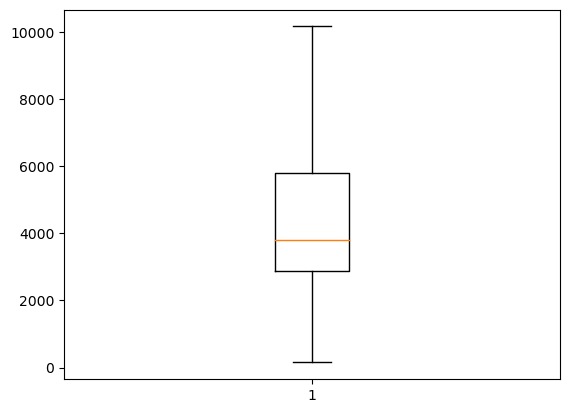

******************** CoapplicantIncome ********************


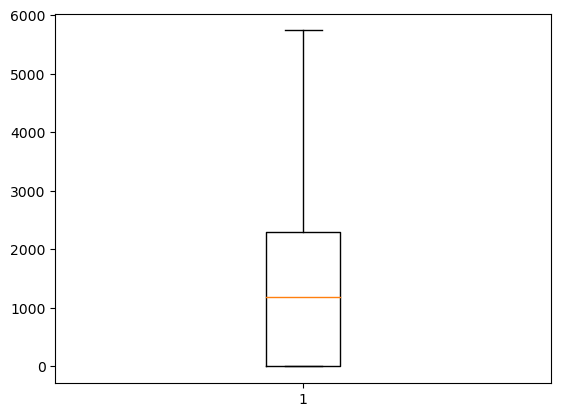

******************** LoanAmount ********************


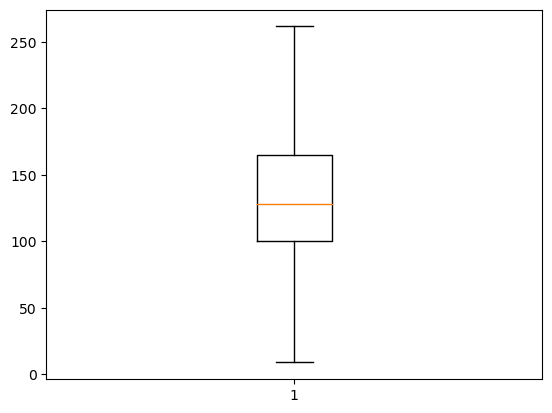

******************** Loan_Amount_Term ********************


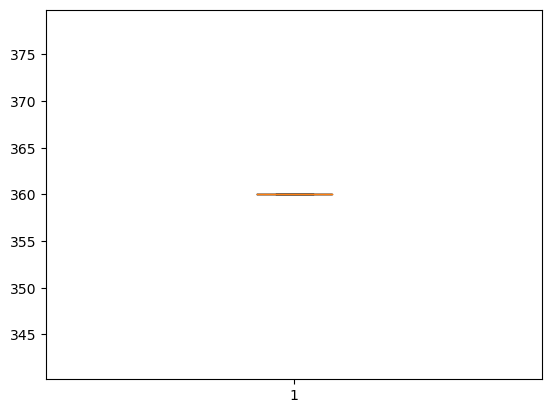

******************** Credit_History ********************


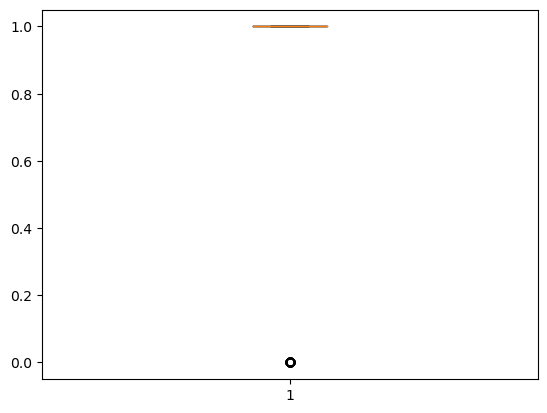

In [15]:
for i in num:
    print("*"*20,i,"*"*20)
    plt.boxplot(loan[i])
    plt.show()

In [16]:
## label encoding
loan.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

loan.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1


In [17]:
loan['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [18]:
# replacing 3+ to 4
loan=loan.replace(to_replace='3+',value=4)
loan['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

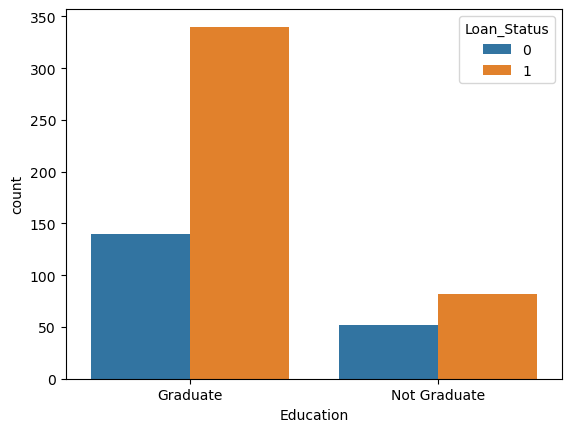

In [19]:
## education and loan_status
sns.countplot(x='Education' , hue='Loan_Status',data=loan)


<AxesSubplot:xlabel='Married', ylabel='count'>

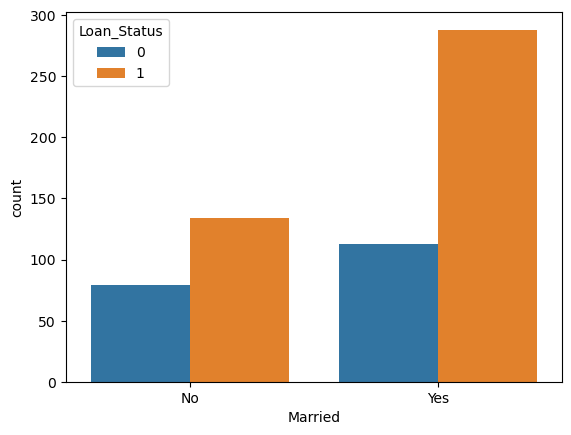

In [20]:
## marital status and Loan_Status
sns.countplot(x='Married' , hue='Loan_Status',data=loan)


In [21]:
loan.replace({'Married':{'No':0,'Yes':1}},inplace=True)

loan.replace({'Gender':{'Female':0,'Male':1}},inplace=True)

loan.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)

loan.replace({'Education':{'Not Graduate':0,'Graduate':1}},inplace=True)

loan.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [22]:
loan.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [23]:
loan=loan.drop(columns=['Loan_ID'],axis=1)

In [24]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,1,1,4,1,0,4106.0,0.0,40.0,360.0,1.0,0,1
611,1,1,1,1,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583.0,0.0,187.0,360.0,1.0,2,1


In [25]:
correlationData=loan.corr()
correlationData

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,-0.045364,-0.000525,0.065040,0.192438,0.143426,NaN,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,-0.012304,0.004489,0.022480,0.221217,0.177417,NaN,0.010938,0.004257,0.091478
Education,-0.045364,-0.012304,1.000000,0.010383,0.203087,0.049895,0.176194,NaN,0.073658,0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.010383,1.000000,0.237122,-0.032784,0.114297,NaN,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.065040,0.022480,0.203087,0.237122,1.000000,-0.228956,0.557953,NaN,0.035345,-0.028661,-0.000442
CoapplicantIncome,0.192438,0.221217,0.049895,-0.032784,-0.228956,1.000000,0.265021,NaN,-0.001710,-0.074451,0.011983
LoanAmount,0.143426,0.177417,0.176194,0.114297,0.557953,0.265021,1.000000,NaN,0.004320,-0.075035,-0.047262
Loan_Amount_Term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_History,0.009170,0.010938,0.073658,-0.001550,0.035345,-0.001710,0.004320,NaN,1.000000,0.001963,0.540556
Property_Area,-0.025752,0.004257,0.065243,-0.030860,-0.028661,-0.074451,-0.075035,NaN,0.001963,1.000000,0.032112


In [27]:
X=loan.drop(columns=['Loan_Status'],axis=1)
y=loan['Loan_Status']
X.shape,y.shape

((614, 11), (614,))

In [28]:
X.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [29]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
X_ros,y_ros=ros.fit_resample(X,y)
print(X_ros.shape,
y_ros.shape)

(844, 11) (844,)


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_ros,y_ros,test_size=0.25,random_state=2)

In [31]:
from sklearn.ensemble import RandomForestClassifier

### Model-Support VEctor Machine


In [32]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
# Define hyperparameters and their potential values
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)
# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest Classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Fit the best model to the training data
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.8957345971563981
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       110
           1       0.89      0.89      0.89       101

    accuracy                           0.90       211
   macro avg       0.90      0.90      0.90       211
weighted avg       0.90      0.90      0.90       211



In [34]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(best_rf_classifier, file)

In [35]:
with open('model.pkl', 'rb') as file:
    loaded_classifier = pickle.load(file)


### Making a predictive System

In [36]:
input_data=(1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0)

#convert to nparray
nparray=np.asarray(input_data)

#reshape
reshaped=nparray.reshape(1,-1)

pred=loaded_classifier.predict(reshaped)


if pred==1:
    print('Eligible for Loan ')
else:
    print('Not Eligible for Loan ')
    

Not Eligible for Loan 


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [37]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849.0,0.0,128.0,360.0,1.0,2
1,1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,2
